In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
df=pd.read_csv('Housing.csv')
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

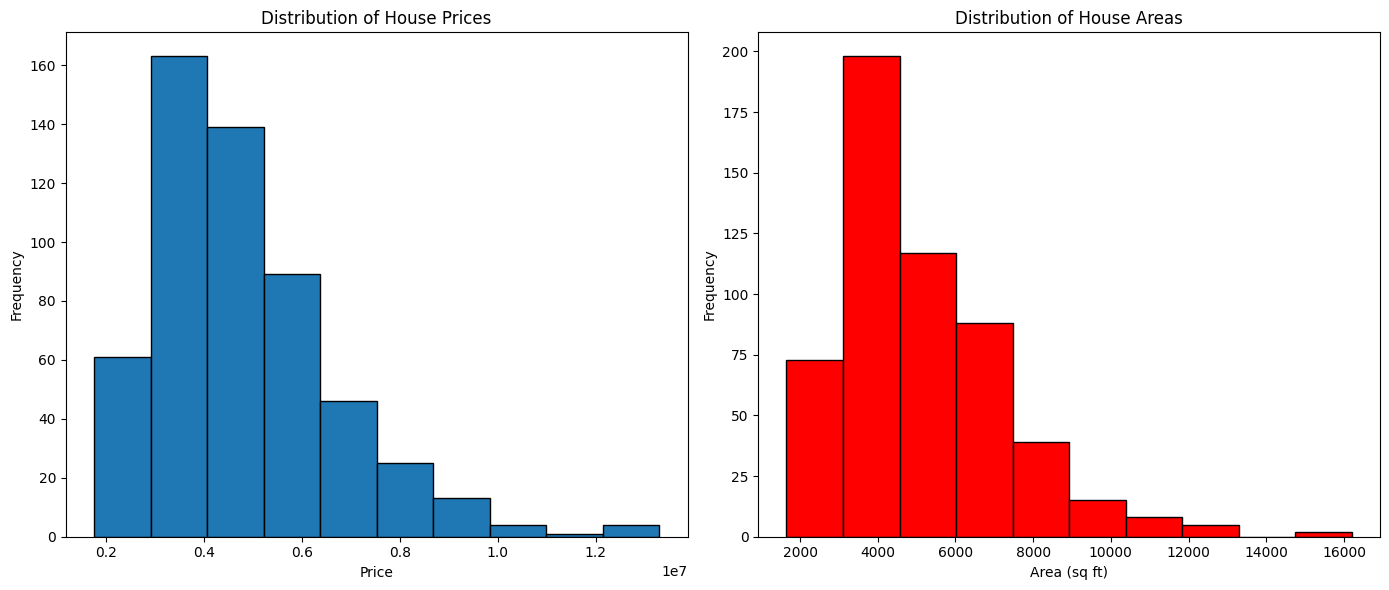

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Histogram for Price
plt.subplot(1, 2, 1)
plt.hist(df['price'], edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for Area
plt.subplot(1, 2, 2)
plt.hist(df['area'], color='red', edgecolor='black')
plt.title('Distribution of House Areas')
plt.xlabel('Area (sq ft)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_5928\341748258.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='furnishingstatus', y='price', palette='Set2')


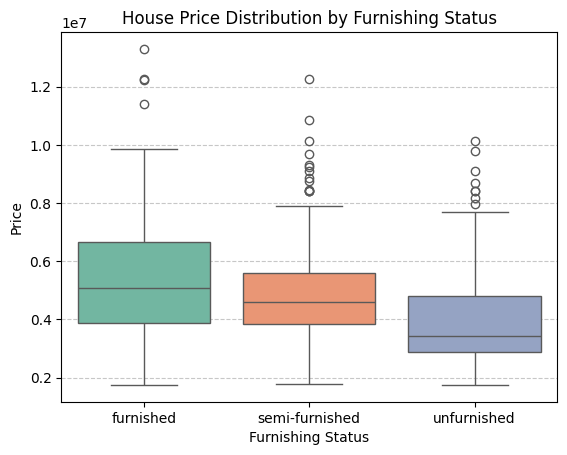

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(data=df, x='furnishingstatus', y='price', palette='Set2')
plt.title('House Price Distribution by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


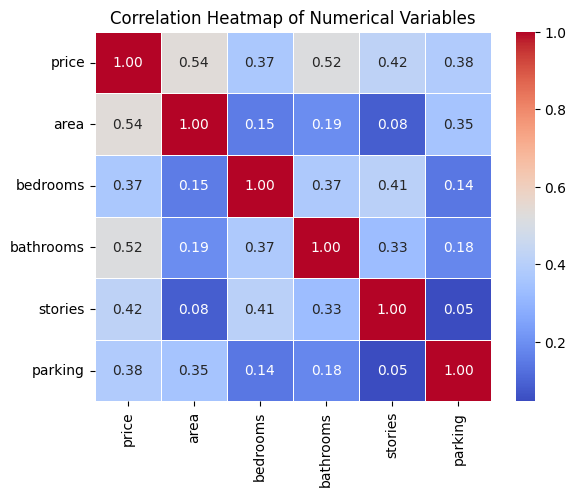

In [9]:
import numpy as np


numerical_columns = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]


correlation_matrix = numerical_columns.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features)
], remainder='passthrough')

X = df.drop('price', axis=1)
y = df['price']
X_encoded = preprocessor.fit_transform(X)
X_encoded_df = pd.DataFrame(X_encoded, columns=preprocessor.get_feature_names_out())

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

results = {}

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Random Forest Classifier Accuracy: {score}')
results['RandomForestClassifier'] = score


# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {score}')
results['LogisticRegression'] = score


# Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Gaussian Naive Bayes Accuracy: {score}')
results['GaussianNB'] = score


Random Forest Classifier Accuracy: 0.018292682926829267
Logistic Regression Accuracy: 0.03048780487804878
Gaussian Naive Bayes Accuracy: 0.012195121951219513


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


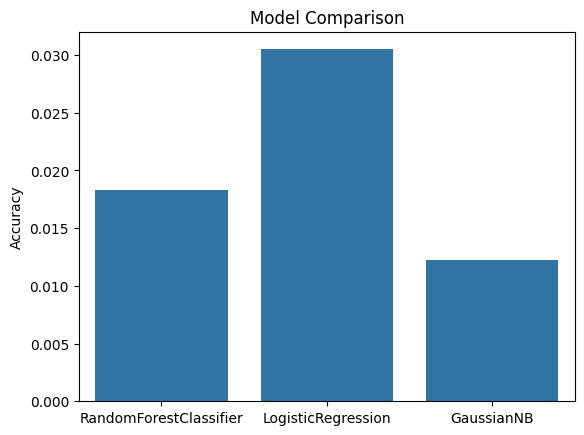

In [23]:
#visualise the results
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

In [24]:
results

{'RandomForestClassifier': 0.018292682926829267,
 'LogisticRegression': 0.03048780487804878,
 'GaussianNB': 0.012195121951219513}

In [33]:
from sklearn.model_selection import GridSearchCV

paramgrid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

grid=GridSearchCV(RandomForestClassifier(), paramgrid, refit=True, verbose=3)
grid.fit(X_train, y_train)
score=grid.score(X_test, y_test)

print(grid.best_params_)
print(f'Random Forest Classifier Accuracy: {score}')


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_es

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.052 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.026 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.053 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.079 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.039 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.039 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.026 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.053 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.053 total time=   0.3s
[

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
250 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 400}
Random Forest Classifier Accuracy: 0.024390243902439025


In [35]:

tuned_model = RandomForestClassifier(n_estimators=300, max_features='sqrt', max_depth=10, criterion='gini')
tuned_model.fit(X_train, y_train)
y_pred = tuned_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Tuned Random Forest Classifier Accuracy: {score}')

Tuned Random Forest Classifier Accuracy: 0.012195121951219513


In [37]:
# Encode the input data
input_data = pd.DataFrame([[7420, 4, 2, 3, 'yes', 'no', 'no', 'no', 'yes', 2, 'yes', 'furnished']],
						  columns=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'])
input_data_encoded = preprocessor.transform(input_data)

# Make prediction
prediction = tuned_model.predict(input_data_encoded)
prediction

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([4830000])

In [38]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [39]:
def predict (area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus):
    input_data = pd.DataFrame([[area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus]],
                          columns=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'])
    input_data_encoded = preprocessor.transform(input_data)
    prediction = tuned_model.predict(input_data_encoded)
    return prediction

result=predict(
    area=7420,
    bedrooms=4,
    bathrooms=2,
    stories=3,
    mainroad='yes',
    guestroom='no',
    basement='no',
    hotwaterheating='no',
    airconditioning='yes',
    parking=2,
    prefarea='yes',
    furnishingstatus='furnished'
)

result=result[0]
result

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


np.int64(4830000)